In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("playlist_with_mood.csv")

# Data preprocessing

popularity_range = [30,70,100]


def create_popularity_label(datapoint):
    
    if datapoint <= 30:
        return "Low"
    elif datapoint > 30 and datapoint <= 70:
        return "Medium"
    return "High"
    
    
data['popularity'] = data['popularity'].apply(create_popularity_label)
data.drop(['mood'], axis=1, inplace = True)
data.to_csv("Spotify_Popularity_data.csv", index = False)


In [3]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5hR6lVUp1JyTrxzihXTvZJ,"Pritam, Papon, Varun Grover","Nazar Teri Toofan (From ""Merry Christmas"")","Nazar Teri Toofan (From ""Merry Christmas"")",Medium,243610,False,0.462,0.628,2,-6.702,1,0.0443,0.2350,0.000000,0.0822,0.252,117.202,4
1,2kPXVr1Sr8hoCv7g41WCuS,"Pritam, Diljit Dosanjh, Kumaar","Banda (From ""Dunki"")","Banda (From ""Dunki"")",Medium,168861,False,0.869,0.746,9,-6.572,1,0.2310,0.1420,0.000000,0.3200,0.609,127.087,4
2,5qMvYzgquX6SnugWREFj6e,"Pritam, Ash King, Varun Grover","Merry Christmas (Title Track) (From ""Merry Chr...","Merry Christmas (Title Track) (From ""Merry Chr...",Medium,152000,False,0.682,0.638,0,-7.158,0,0.0321,0.5440,0.000000,0.1780,0.821,105.063,4
3,0VXBujZKMLLlmee25BXEQs,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Sher Khul Gaye (From ""Fighter"")","Sher Khul Gaye (From ""Fighter"")",High,180172,False,0.880,0.630,0,-6.719,0,0.0606,0.0219,0.000000,0.0663,0.810,123.021,4
4,1XMQPTzIjDiPUK0siiavXi,Shane Stephen,Meri Ye Raahein,Meri Ye Raahein,Low,273488,False,0.390,0.262,5,-13.751,1,0.0379,0.6910,0.000005,0.1310,0.479,82.168,4


<Axes: >

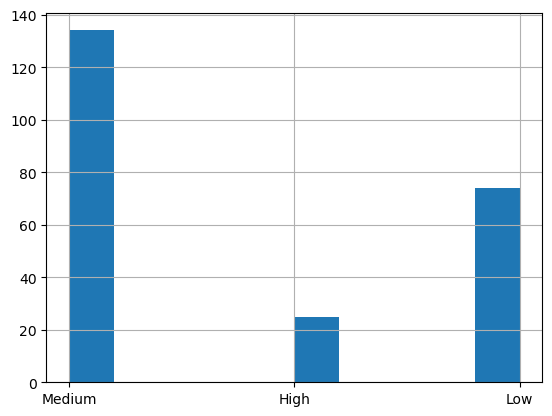

In [4]:
data['popularity'].hist()

In [5]:
data = pd.read_csv("Spotify_Popularity_data.csv")
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5hR6lVUp1JyTrxzihXTvZJ,"Pritam, Papon, Varun Grover","Nazar Teri Toofan (From ""Merry Christmas"")","Nazar Teri Toofan (From ""Merry Christmas"")",Medium,243610,False,0.462,0.628,2,-6.702,1,0.0443,0.2350,0.000000,0.0822,0.252,117.202,4
1,2kPXVr1Sr8hoCv7g41WCuS,"Pritam, Diljit Dosanjh, Kumaar","Banda (From ""Dunki"")","Banda (From ""Dunki"")",Medium,168861,False,0.869,0.746,9,-6.572,1,0.2310,0.1420,0.000000,0.3200,0.609,127.087,4
2,5qMvYzgquX6SnugWREFj6e,"Pritam, Ash King, Varun Grover","Merry Christmas (Title Track) (From ""Merry Chr...","Merry Christmas (Title Track) (From ""Merry Chr...",Medium,152000,False,0.682,0.638,0,-7.158,0,0.0321,0.5440,0.000000,0.1780,0.821,105.063,4
3,0VXBujZKMLLlmee25BXEQs,"Vishal-Shekhar, Vishal Dadlani, Shekhar Ravjia...","Sher Khul Gaye (From ""Fighter"")","Sher Khul Gaye (From ""Fighter"")",High,180172,False,0.880,0.630,0,-6.719,0,0.0606,0.0219,0.000000,0.0663,0.810,123.021,4
4,1XMQPTzIjDiPUK0siiavXi,Shane Stephen,Meri Ye Raahein,Meri Ye Raahein,Low,273488,False,0.390,0.262,5,-13.751,1,0.0379,0.6910,0.000005,0.1310,0.479,82.168,4


In [6]:
## Removing Track_Id, Artists, Album_Name, Track_Name
remove_cols = ['track_id','artists','album_name','track_name']
data.drop(remove_cols,axis=1, inplace=True)

In [7]:
# No Null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        233 non-null    object 
 1   duration_ms       233 non-null    int64  
 2   explicit          233 non-null    bool   
 3   danceability      233 non-null    float64
 4   energy            233 non-null    float64
 5   key               233 non-null    int64  
 6   loudness          233 non-null    float64
 7   mode              233 non-null    int64  
 8   speechiness       233 non-null    float64
 9   acousticness      233 non-null    float64
 10  instrumentalness  233 non-null    float64
 11  liveness          233 non-null    float64
 12  valence           233 non-null    float64
 13  tempo             233 non-null    float64
 14  time_signature    233 non-null    int64  
dtypes: bool(1), float64(9), int64(4), object(1)
memory usage: 25.8+ KB


In [8]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.loc[:, ~data.columns.isin(numeric_cols)]

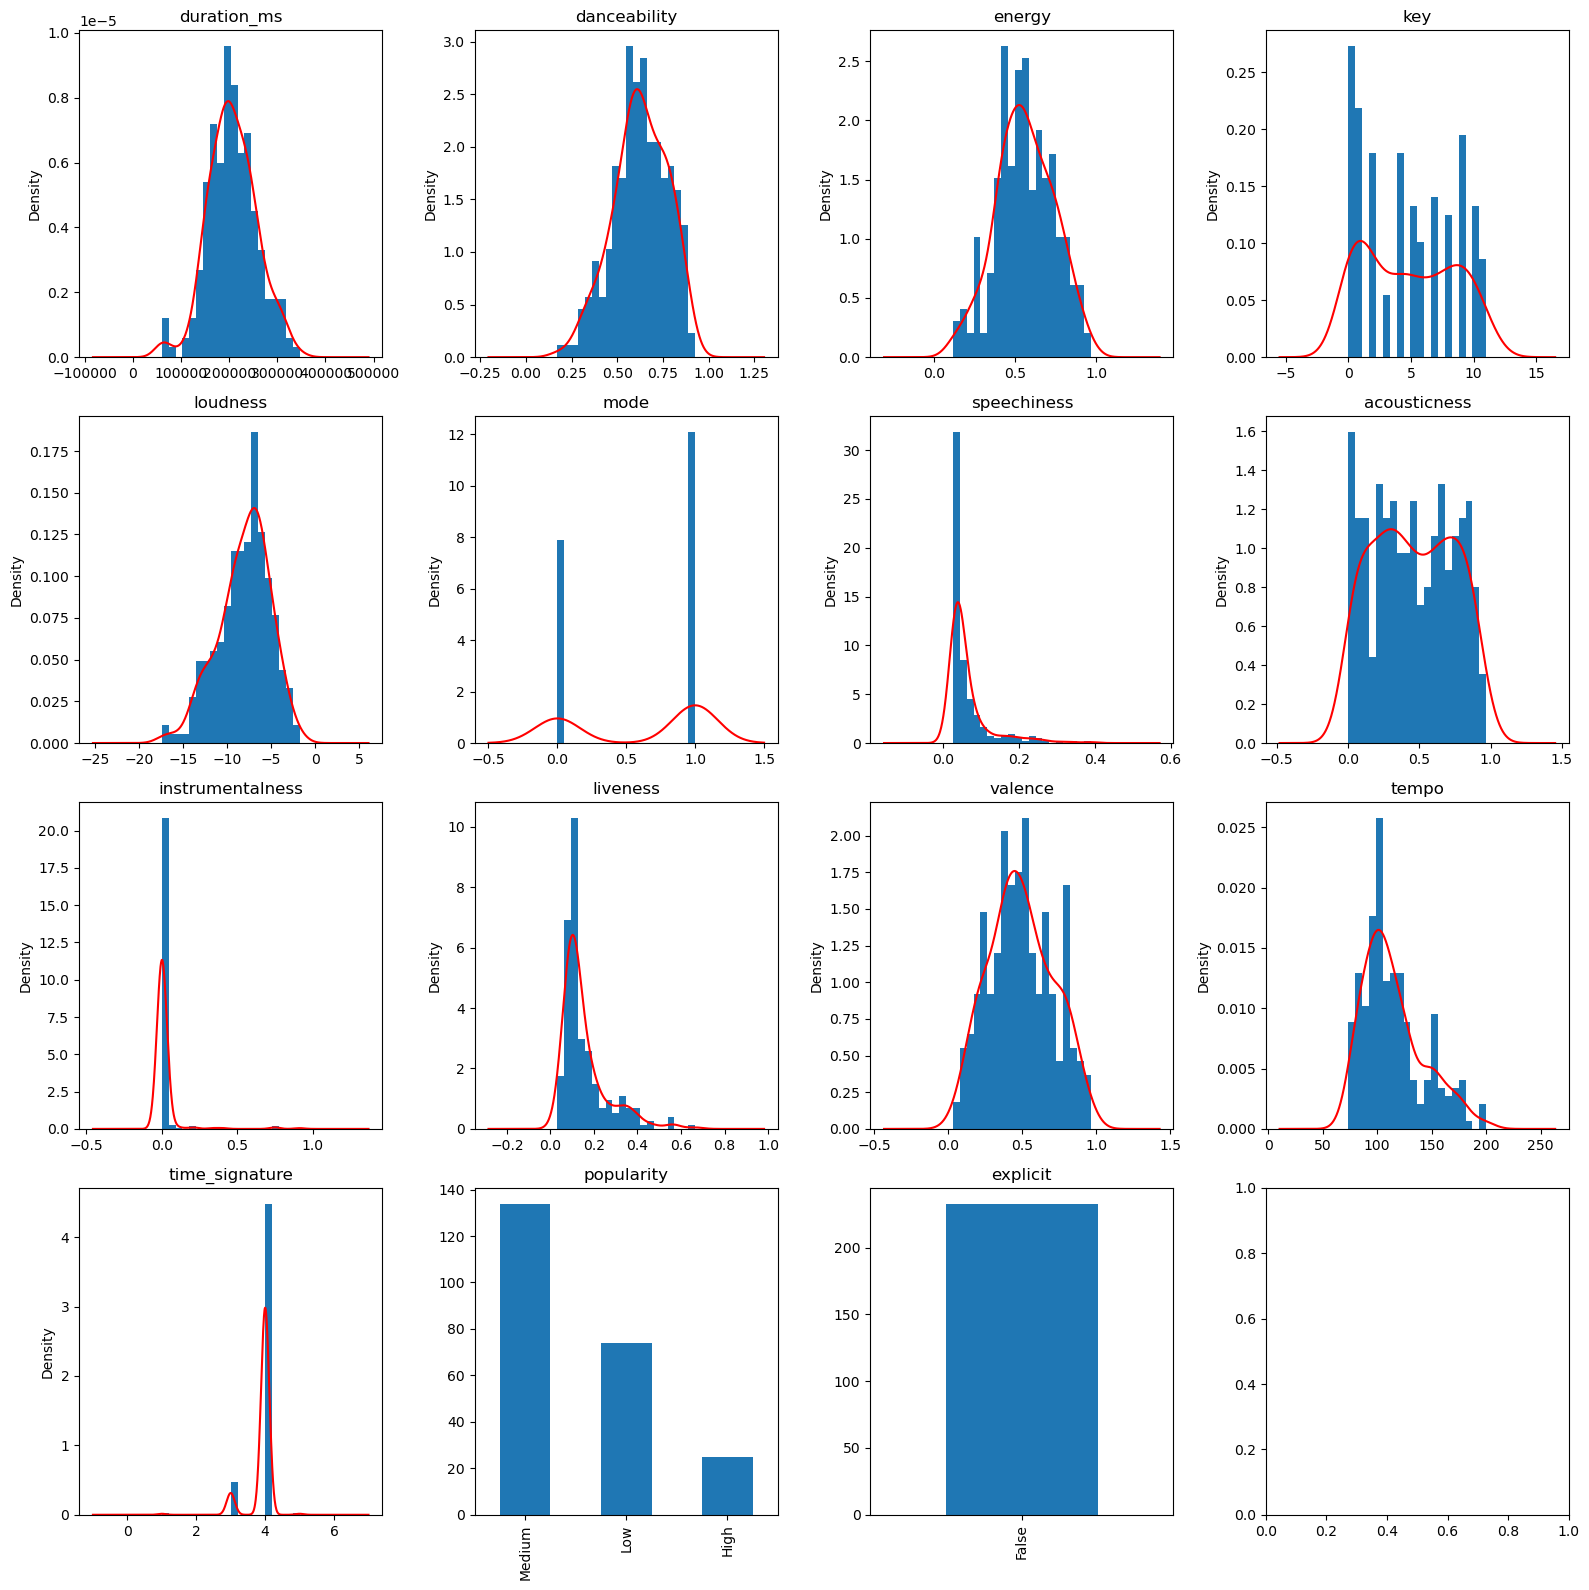

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i, column in enumerate(numeric_cols):
    ax = axes[i // 4, i % 4]
    data[column].hist(ax=ax, bins=20, density=True)
    data[column].plot(kind='kde', ax=ax, color='red')
    ax.set_title(column) 

for j, column in enumerate(categorical_cols):
    ax = axes[(i+j+1)//4, (i+j+1) % 4]
    data[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()


In [10]:
# From the above histogram, explicit has only one value which is False.
# So adding it to the model wont make sense since there is no variability.
# So removing it from the data

data.drop(['explicit'], inplace=True, axis=1)

In [11]:
# Since the data is duplicated,lets remove the duplicated data
data[data.duplicated()]

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
230,Medium,249105,0.777,0.923,11,-3.772,0,0.23,0.243,0.0,0.104,0.71,166.093,4


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming you have your data stored in a pandas DataFrame called df
# and your target variable (label column) is named 'popularity'

# Separate features and target variable
X = data.drop('popularity', axis=1)  # Assuming 'popularity' is the target variable
y = data['popularity']

# Instantiate SMOTE
smote = SMOTE()

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenate resampled features and target variable into a new DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Print the value counts of the target variable after oversampling
print(df_resampled['popularity'].value_counts())


Medium    133
High      133
Low       133
Name: popularity, dtype: int64


In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [97]:
train_data = pd.DataFrame(X_train, columns = data.columns)
train_data['popularity'] = y_train
train_data.head(15)
train_data.to_csv("Train_Data.csv", index = False)

In [96]:
test_data = pd.DataFrame(X_test, columns = data.columns)
test_data['popularity'] = y_test
test_data.head()
test_data.to_csv("Test_Data.csv", index = False)

In [18]:
DTree1 = DecisionTreeClassifier()
DTree1.fit(X_train, y_train)
y_test_pred = DTree1.predict(X_test)
y_train_pred = DTree1.predict(X_train)


acc = accuracy_score(y_test, y_test_pred)
CM = confusion_matrix(y_test,y_test_pred)
print(f"Accuracy of the DTree : {np.round(acc,3)*100}")
print(f"Confusion Matrix: \n {CM}")

Accuracy of the DTree : 59.199999999999996
Confusion Matrix: 
 [[26  3  4]
 [10 26 11]
 [11 10 19]]


In [19]:
DTree1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [20]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       100
         Low       1.00      1.00      1.00        86
      Medium       1.00      1.00      1.00        93

    accuracy                           1.00       279
   macro avg       1.00      1.00      1.00       279
weighted avg       1.00      1.00      1.00       279



In [21]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        High       0.55      0.79      0.65        33
         Low       0.67      0.55      0.60        47
      Medium       0.56      0.47      0.51        40

    accuracy                           0.59       120
   macro avg       0.59      0.61      0.59       120
weighted avg       0.60      0.59      0.59       120



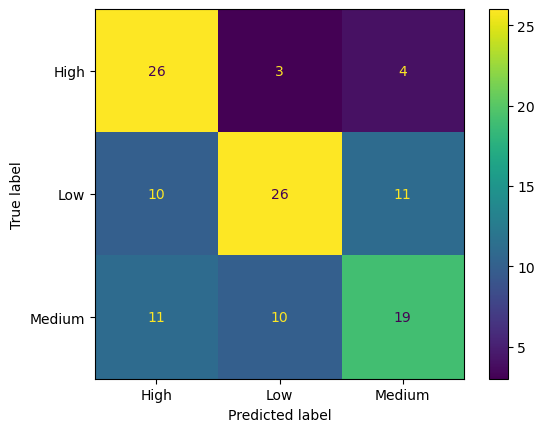

In [22]:

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred, labels=DTree1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=DTree1.classes_)
disp.plot()
plt.show()

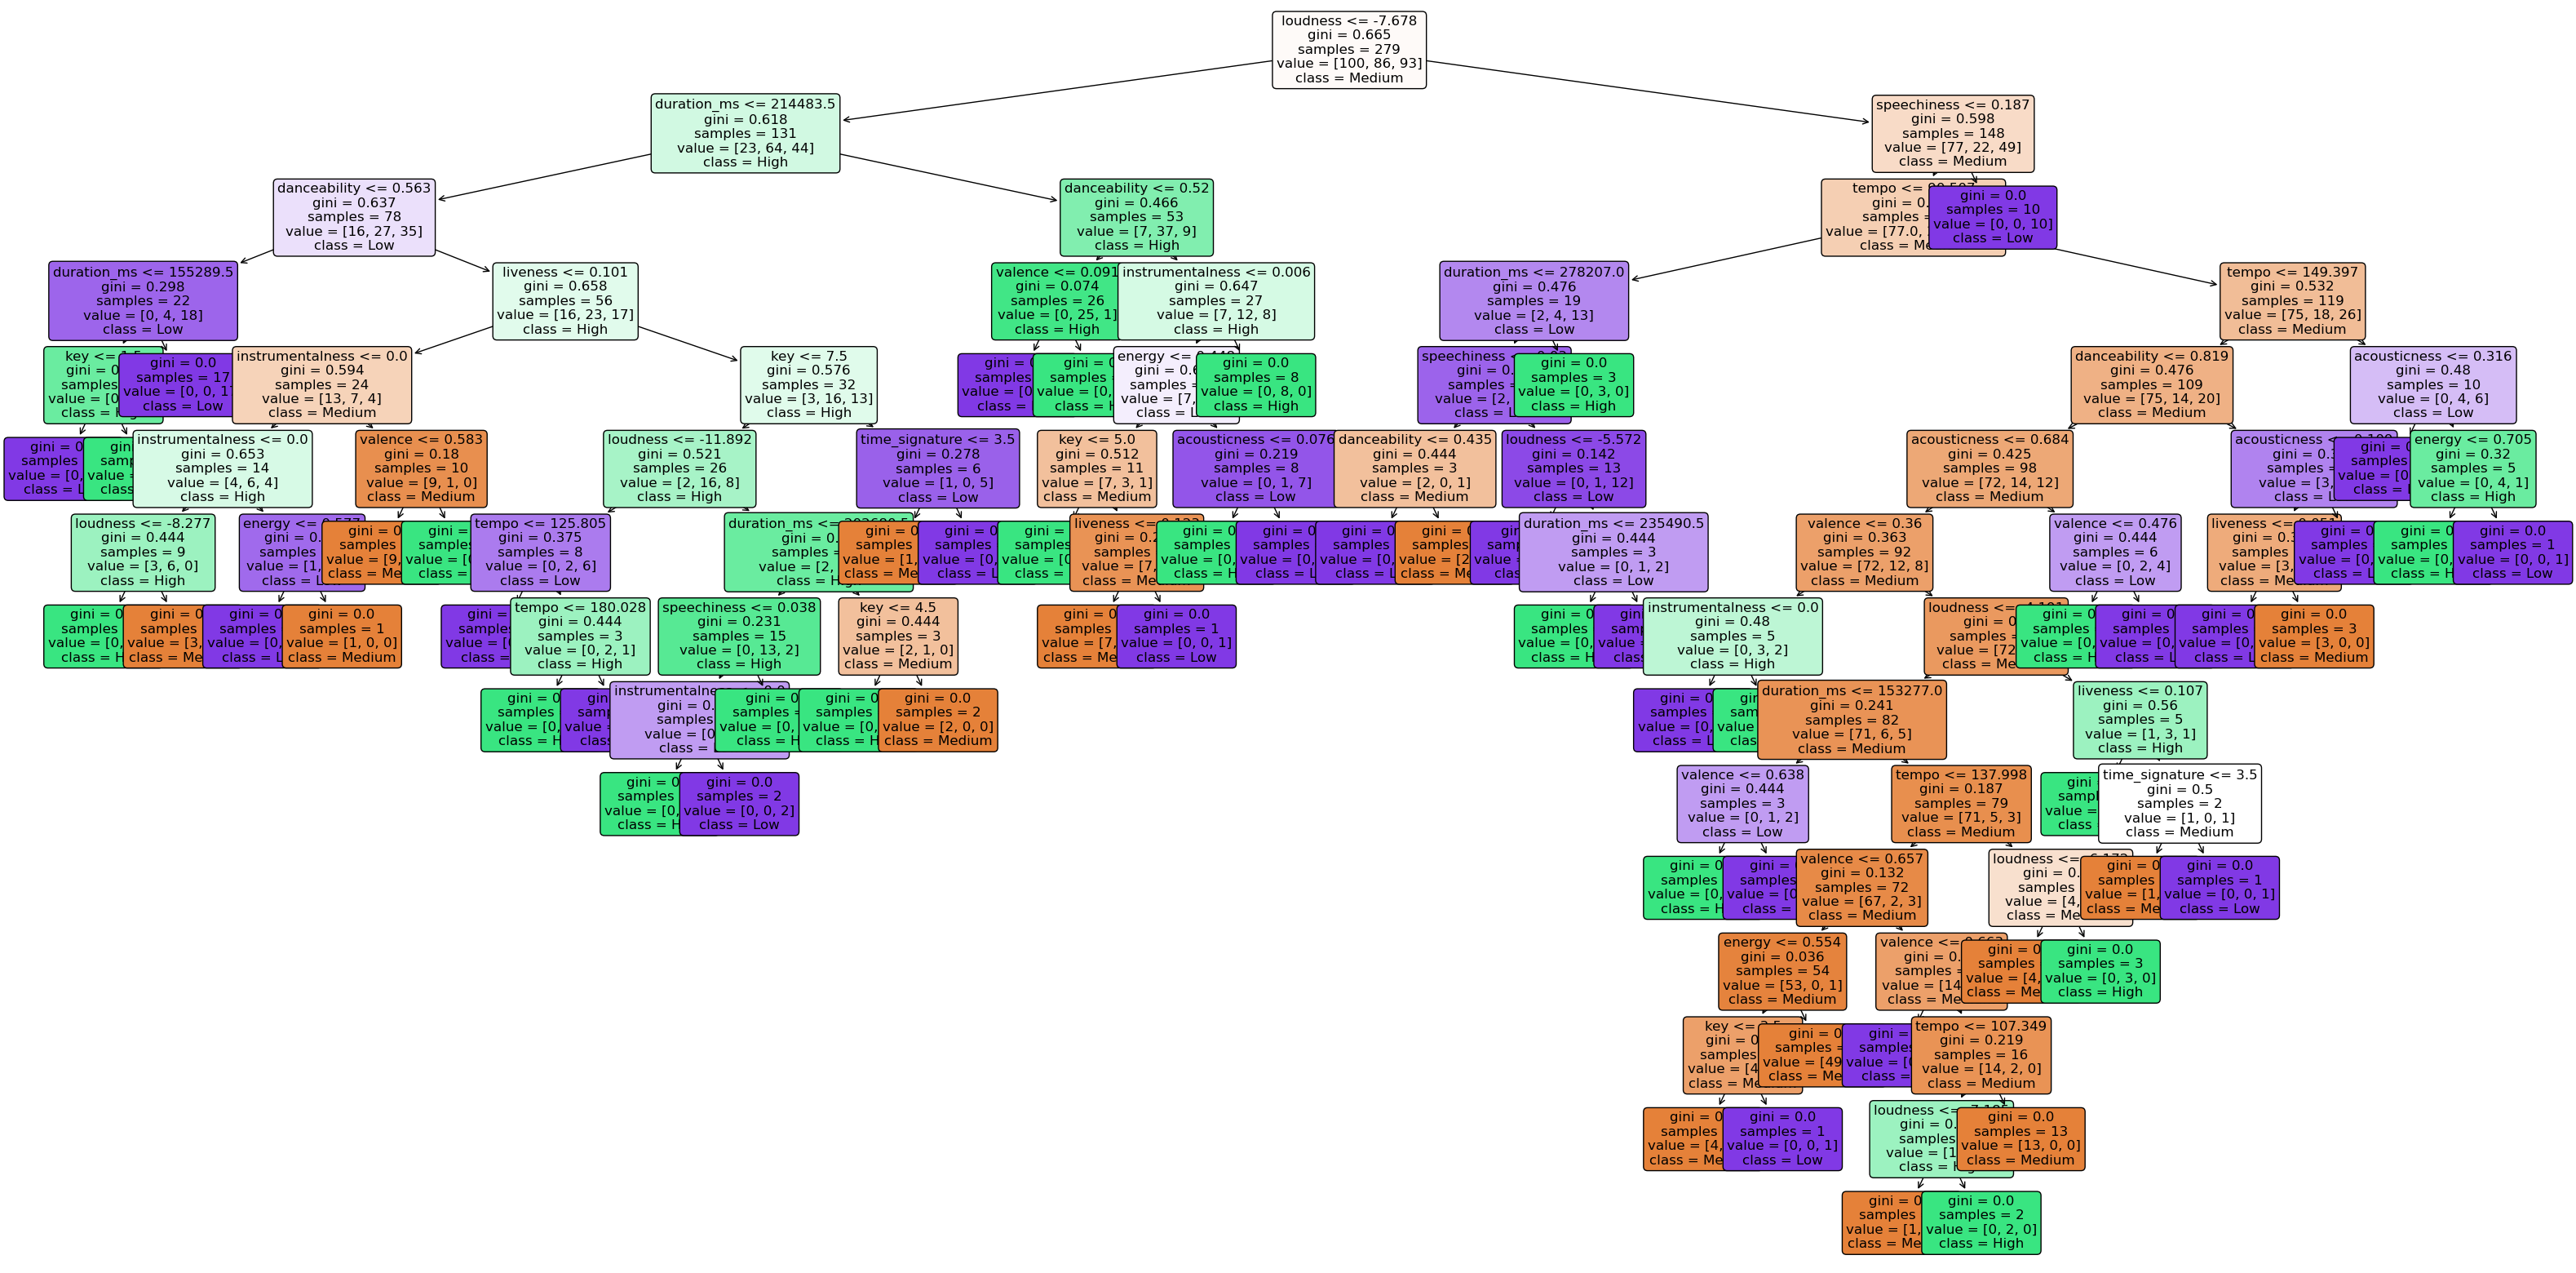

In [88]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(40, 20))  # Adjust the figsize as needed
_ = plot_tree(DTree1, filled=True, feature_names=X.columns.tolist(), 
              class_names=data['popularity'].unique().tolist(), rounded=True, fontsize=12)


In [90]:
#Given that the Decision Tree model currently has a high depth but low accuracy.
#we aim to explore whether reducing the max_depth hyperparameter could potentially improve the model's accuracy.

DTree2 = DecisionTreeClassifier(max_depth=11, max_features=None)
DTree2.fit(X_train, y_train)
y_test_pred = DTree2.predict(X_test)
y_train_pred = DTree2.predict(X_train)

acc = accuracy_score(y_test, y_test_pred)
CM = confusion_matrix(y_test,y_test_pred)
print(f"Accuracy of the DTree : {np.round(acc,3)*100}")
print(f"Confusion Matrix: \n {CM}")

Accuracy of the DTree : 62.5
Confusion Matrix: 
 [[27  2  4]
 [ 7 26 14]
 [ 8 10 22]]


In [91]:
DTree2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [92]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

        High       0.95      1.00      0.98       100
         Low       1.00      0.98      0.99        86
      Medium       1.00      0.97      0.98        93

    accuracy                           0.98       279
   macro avg       0.98      0.98      0.98       279
weighted avg       0.98      0.98      0.98       279



In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        High       0.64      0.82      0.72        33
         Low       0.68      0.55      0.61        47
      Medium       0.55      0.55      0.55        40

    accuracy                           0.62       120
   macro avg       0.63      0.64      0.63       120
weighted avg       0.63      0.62      0.62       120



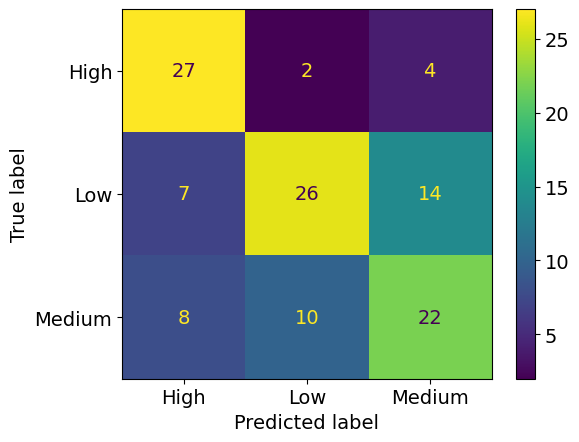

Confusion Matrix: 
 [[27  2  4]
 [ 7 26 14]
 [ 8 10 22]]


In [94]:

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred, labels=DTree2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=DTree2.classes_)
disp.plot()
plt.show()
print(f"Confusion Matrix: \n {cm}")

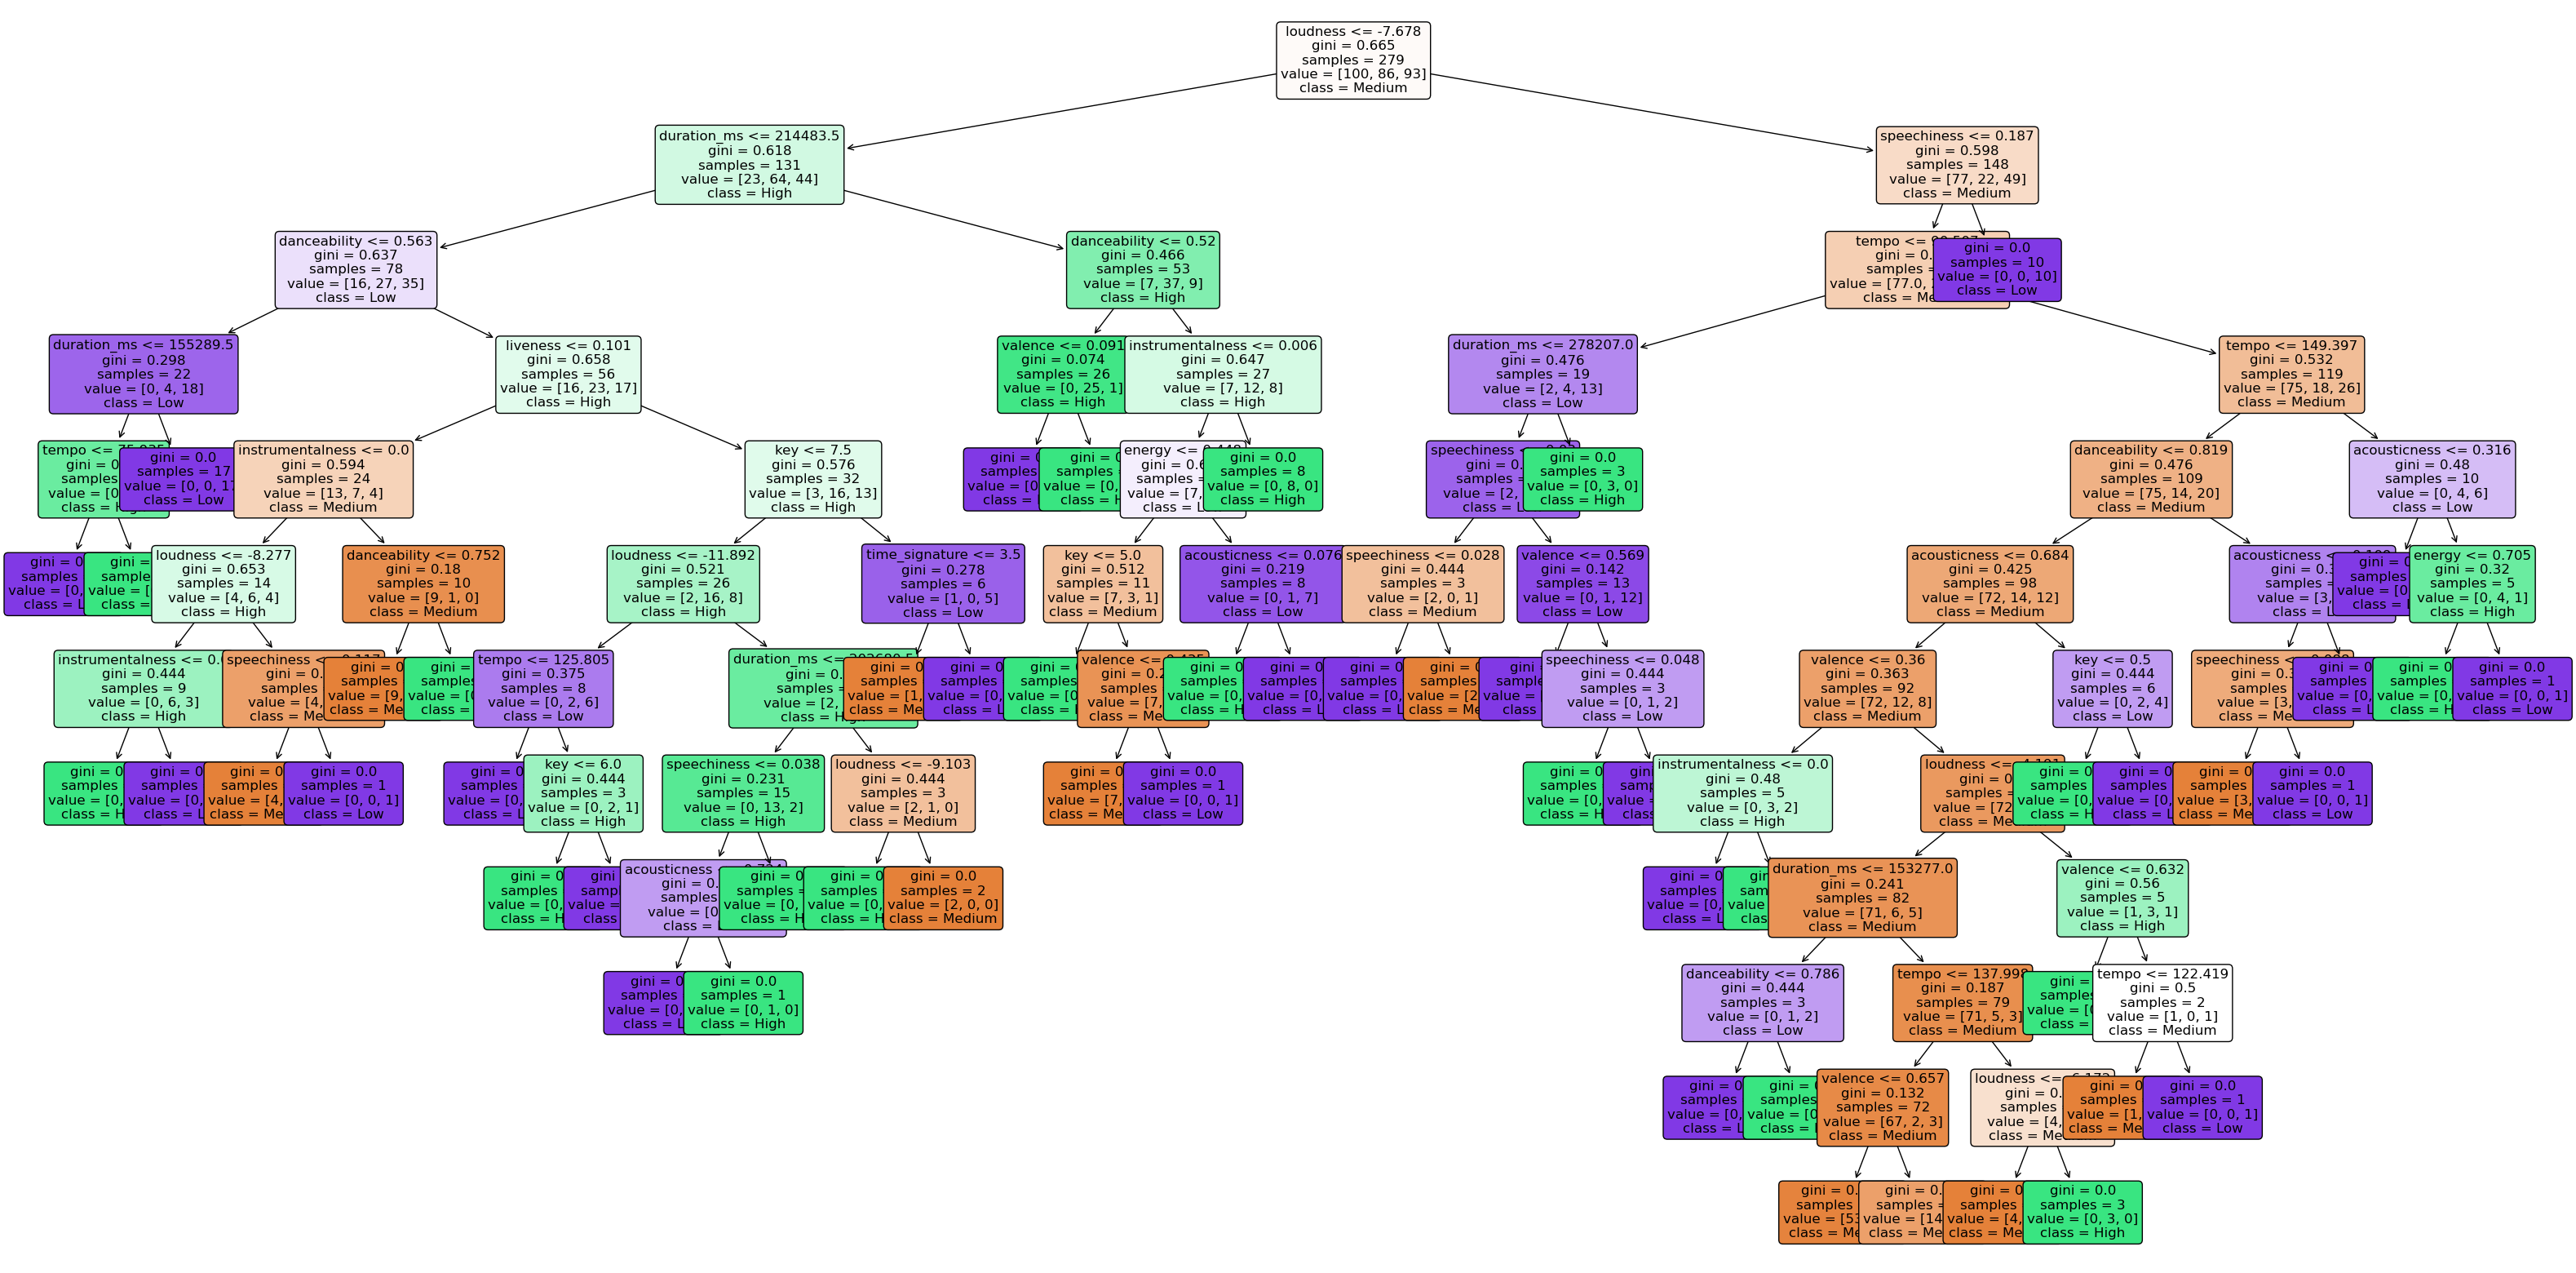

In [87]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(40, 20))  # Adjust the figsize as needed
_ = plot_tree(DTree2, filled=True, feature_names=X.columns.tolist(), 
              class_names=data['popularity'].unique().tolist(), rounded=True, fontsize=12)


In [30]:
#We'll add a parameter called min_samples_leaf which tells the model the minimum number of samples that should be at a leaf (end) node. This helps prevent the creation of leaf nodes with very few samples, which can improve the model's accuracy by reducing overfitting

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


# Define parameter grid
param_grid = {
    'max_depth': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],# Try deeper trees
    'min_samples_split': [1,2, 3, 4, 5, 10],   # Try higher values to reduce overfitting
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],     # Try smaller values to capture more information in leaf nodes
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Try different ways of selecting features
    'class_weight': ['balanced',None]
}
# Instantiate DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Optionally, evaluate performance
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)



Best Parameters: {'class_weight': 'balanced', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4}
Accuracy: 0.6333333333333333


/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
9000 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/saivamshichallamalla/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _

In [45]:
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)


acc = accuracy_score(y_test, y_test_pred)
CM = confusion_matrix(y_test,y_test_pred)
print(f"Accuracy of the DTree : {np.round(acc,3)*100}")
print(f"Confusion Matrix: \n {CM}")

Accuracy of the DTree : 63.3
Confusion Matrix: 
 [[27  6  0]
 [10 26 11]
 [ 9  8 23]]


In [52]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        High       0.95      0.93      0.94       100
         Low       0.92      0.93      0.92        86
      Medium       0.93      0.94      0.93        93

    accuracy                           0.93       279
   macro avg       0.93      0.93      0.93       279
weighted avg       0.93      0.93      0.93       279

              precision    recall  f1-score   support

        High       0.59      0.82      0.68        33
         Low       0.65      0.55      0.60        47
      Medium       0.68      0.57      0.62        40

    accuracy                           0.63       120
   macro avg       0.64      0.65      0.63       120
weighted avg       0.64      0.63      0.63       120



              precision    recall  f1-score   support

        High       0.59      0.82      0.68        33
         Low       0.65      0.55      0.60        47
      Medium       0.68      0.57      0.62        40

    accuracy                           0.63       120
   macro avg       0.64      0.65      0.63       120
weighted avg       0.64      0.63      0.63       120



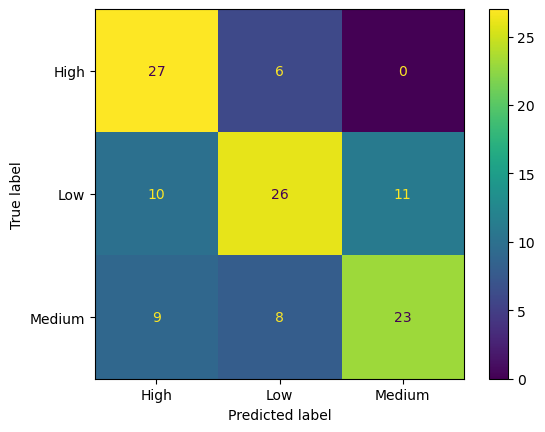

In [48]:

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=best_model.classes_)
disp.plot()
plt.show()

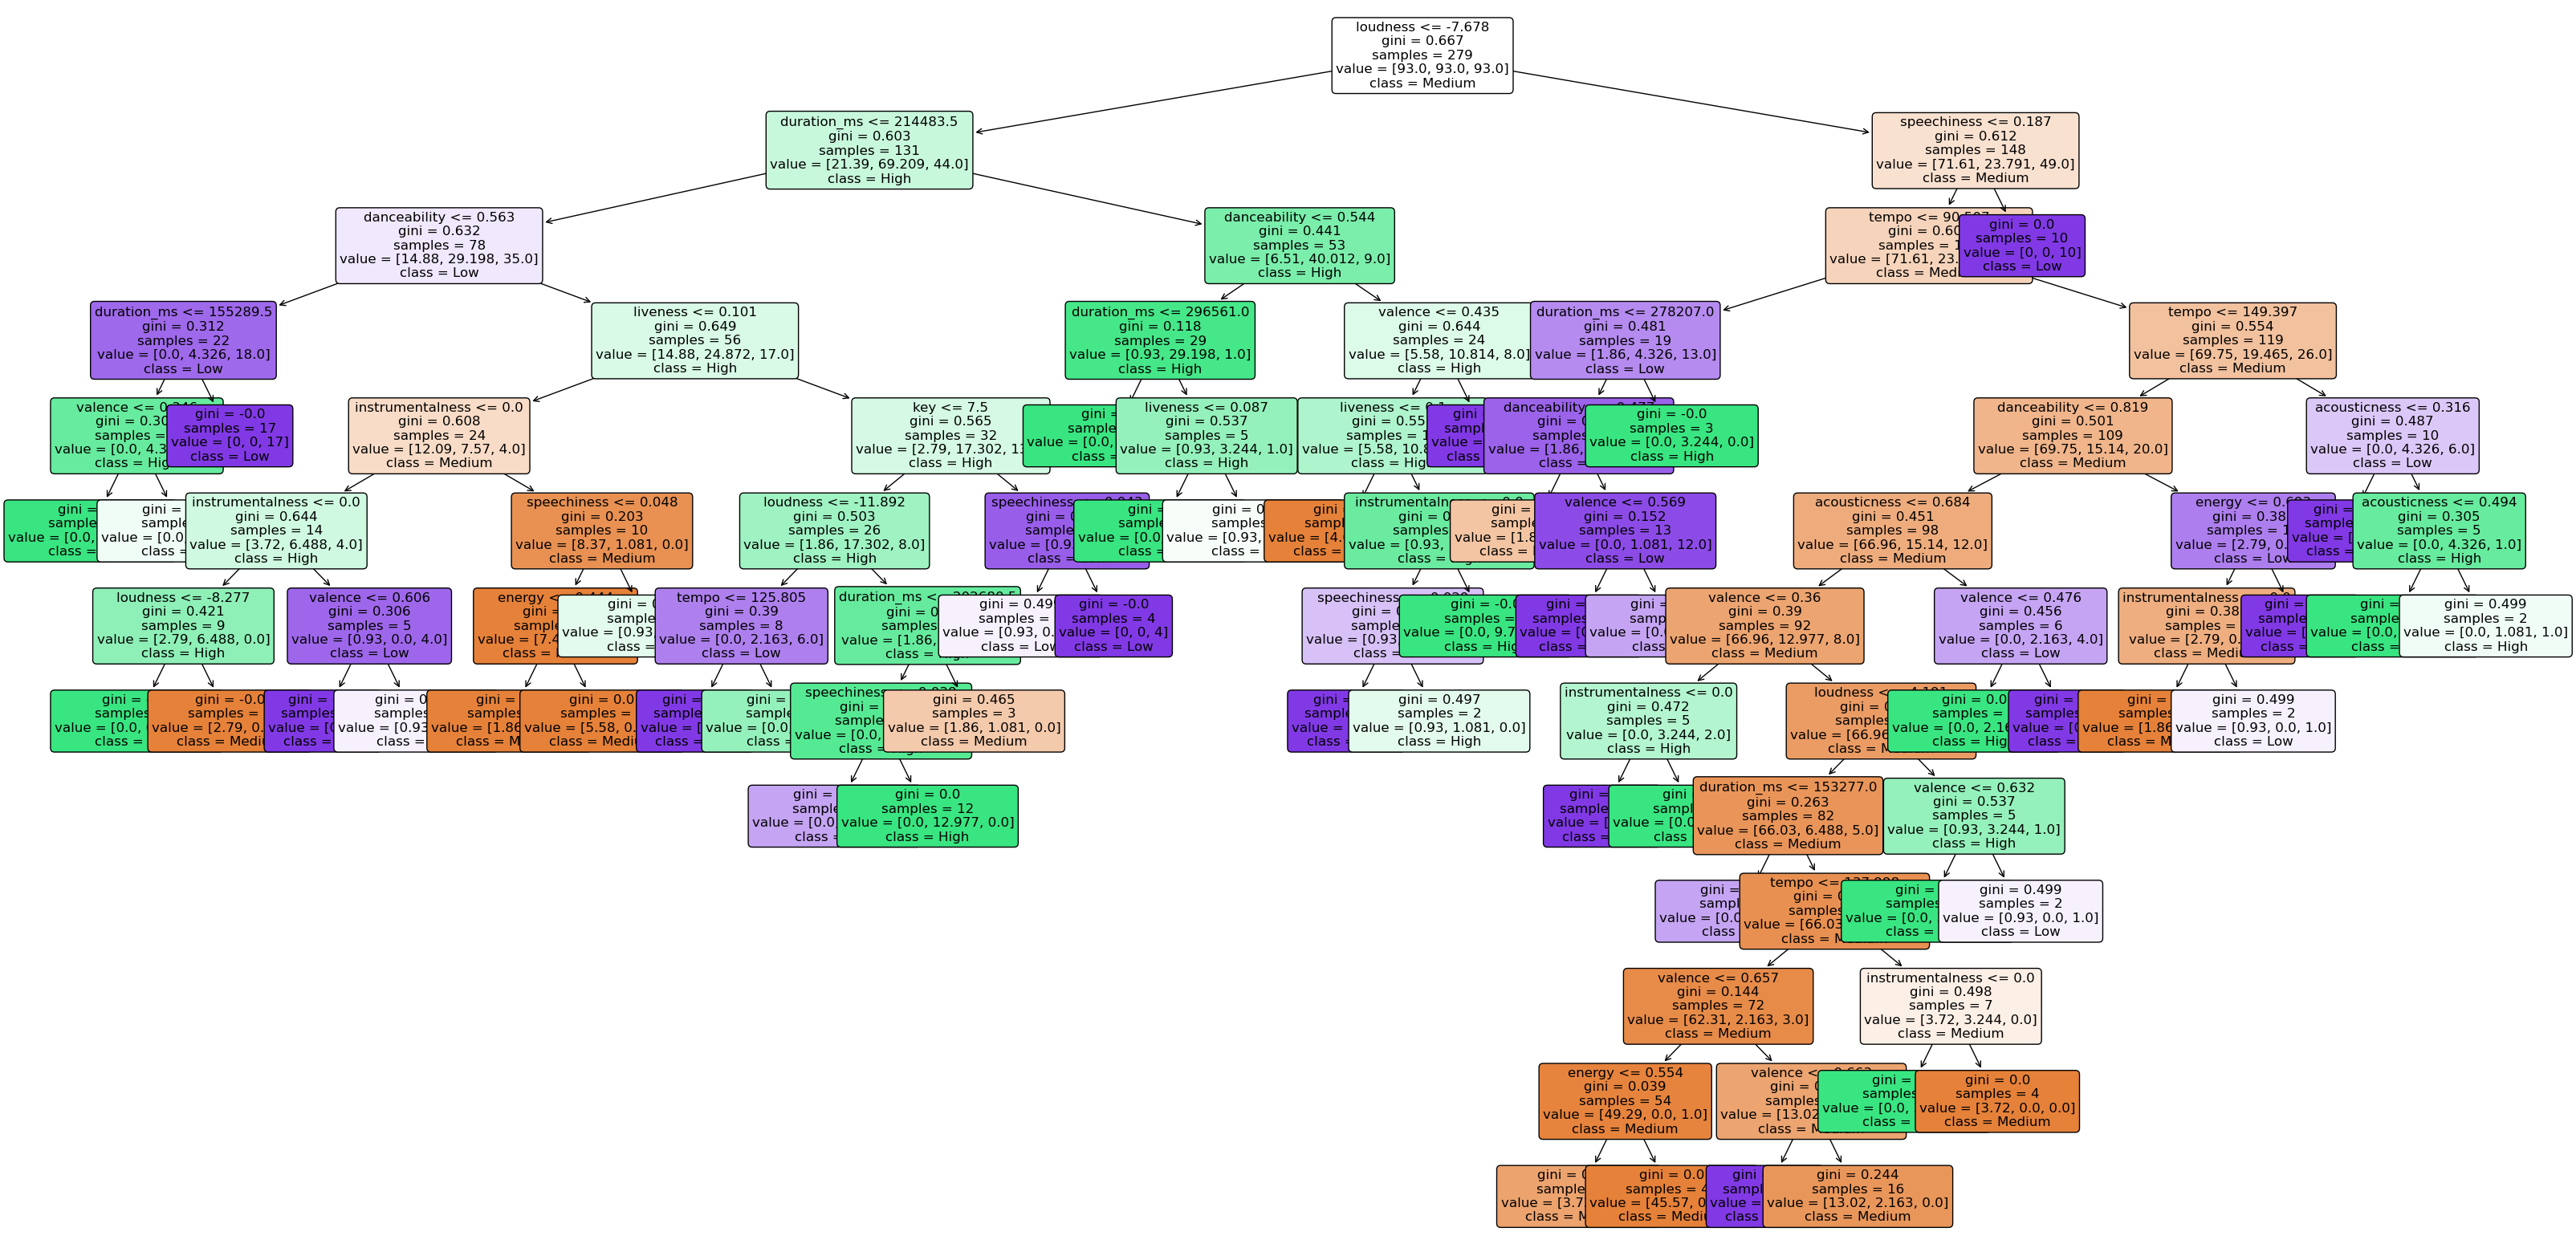

In [81]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(40, 20))  # Adjust the figsize as needed
_ = plot_tree(best_model, filled=True, feature_names=X.columns.tolist(), 
              class_names=data['popularity'].unique().tolist(), rounded=True, fontsize=12)


In [50]:
importances_sk = best_model.feature_importances_

features = X_train.columns
# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

print(f"Feature importance by sklearn: {feature_importance_sk}")



Feature importance by sklearn: {'duration_ms': 0.138, 'danceability': 0.116, 'energy': 0.019, 'key': 0.021, 'loudness': 0.172, 'mode': 0.0, 'speechiness': 0.078, 'acousticness': 0.058, 'instrumentalness': 0.098, 'liveness': 0.06, 'valence': 0.129, 'tempo': 0.11, 'time_signature': 0.0}


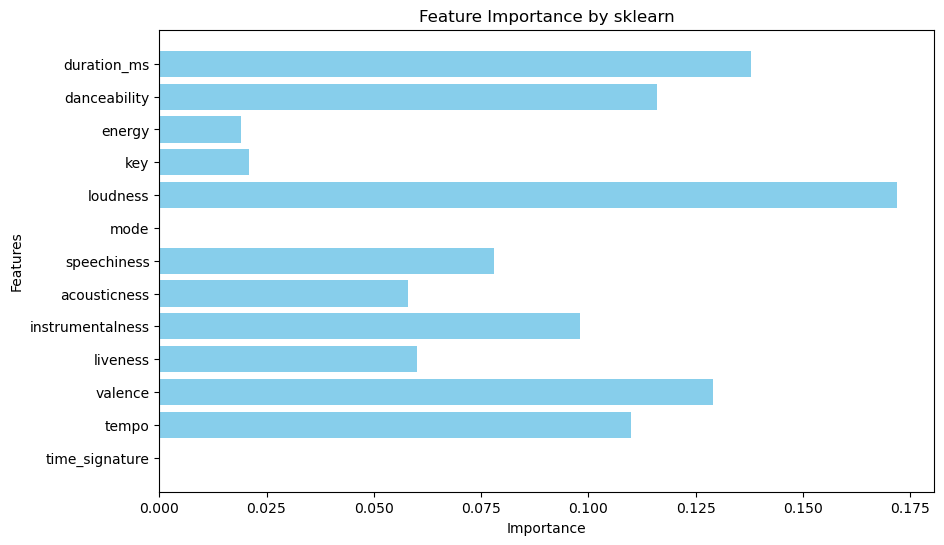

In [51]:
# Extract features and importance values
features = list(feature_importance_sk.keys())
importance_values = list(feature_importance_sk.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, importance_values, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance by sklearn')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features on top
plt.show()
